In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

In [2]:
%load_ext autoreload
%autoreload 2

from bs_helpers import *
from bs_gameclass import *
from utils import *

In [3]:

def create_sea_ships(seed=None): # diese funktion ist anders als die bei unet!!
    'Creates a sea with random ships on it'
    rng = random.Random(seed)
    sea = np.zeros((10,10))
    ships = np.zeros((10,10,10)) # extra information which kind of ship is where
    k = 0
    for l in [5,4,3,2]: # Länge
        n = 6-l # Anzahl
        for _ in range(n):
            # Boot mit Länge l platzieren
            while True:
                t = rng.random() < 0.5
                if t:
                    sea = sea.T # Transponieren
                    ships = ships.transpose(1,0,2)
                px = rng.randint(0, 10-l)
                py = rng.randint(0, 9)
                if sum(sea[px:px+l,py]) > 0:
                    continue
                sea[px:px+l, py] = 1
                ships[px:px+l, py, k] = 1
                if t:
                    sea = sea.T # Transponieren
                    ships = ships.transpose(1,0,2)
                k += 1
                break
    return sea, ships

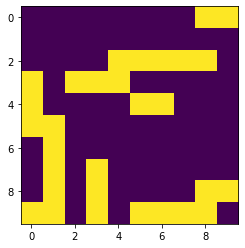

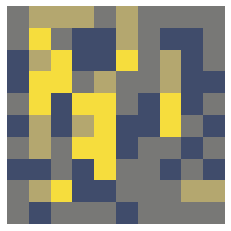

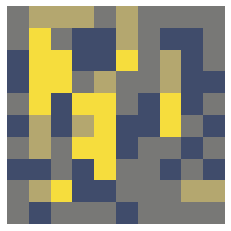

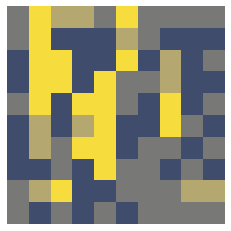

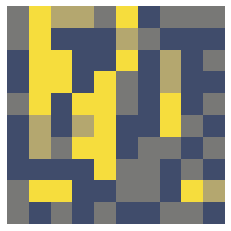

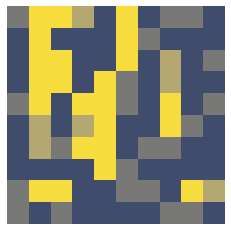

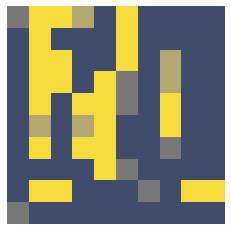

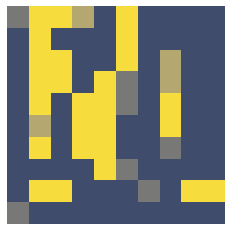

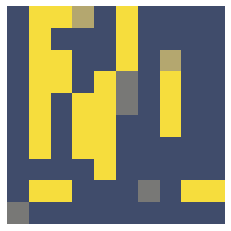

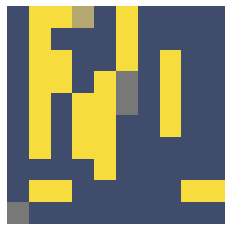

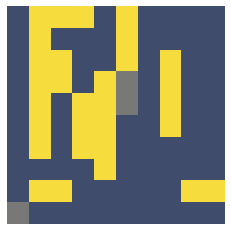

In [23]:
sea, ships = create_sea_ships()
s = GameState()
moves = []
rewards = []
sunken = [] # wenn ein schiff komplett versinkt
while not GameClass.getEnded(s):
    vms = GameClass.getValidActions(s)
    k = np.random.choice(range(len(vms)))
    a = vms[k]
    s = GameClass.getNextState(s, a, sea)
    r = sea[a]
    sn = 0
    for l in range(10):
        if ships[a][l]:
            if np.sum(ships[:,:,l] * (1-s.det)) == 0:
                sn = 1
    moves.append(a)
    rewards.append(r)
    sunken.append(s)
    if sn:
        plot_sea(sea, s.det)
        plt.show()

In [24]:
moves

[(8, 2),
 (3, 1),
 (2, 8),
 (2, 0),
 (1, 1),
 (5, 0),
 (7, 9),
 (6, 4),
 (5, 2),
 (5, 7),
 (1, 3),
 (4, 8),
 (4, 4),
 (5, 4),
 (7, 7),
 (3, 9),
 (5, 9),
 (9, 5),
 (8, 3),
 (4, 1),
 (7, 1),
 (6, 8),
 (5, 6),
 (3, 2),
 (1, 4),
 (7, 4),
 (4, 6),
 (5, 5),
 (4, 3),
 (2, 4),
 (7, 0),
 (2, 5),
 (1, 7),
 (3, 8),
 (4, 2),
 (4, 7),
 (7, 3),
 (2, 3),
 (6, 3),
 (9, 1),
 (3, 0),
 (6, 5),
 (8, 4),
 (1, 8),
 (2, 2),
 (2, 1),
 (2, 6),
 (9, 3),
 (0, 5),
 (1, 9),
 (0, 1),
 (3, 3),
 (6, 0),
 (1, 2),
 (3, 4),
 (0, 6),
 (9, 9),
 (3, 6),
 (7, 2),
 (8, 8),
 (8, 7),
 (9, 6),
 (8, 1),
 (0, 9),
 (9, 4),
 (7, 6),
 (0, 4),
 (6, 9),
 (1, 0),
 (0, 2),
 (7, 8),
 (1, 5),
 (9, 7),
 (8, 5),
 (4, 0),
 (2, 9),
 (0, 8),
 (5, 8),
 (1, 6),
 (6, 2),
 (4, 9),
 (6, 6),
 (6, 1),
 (0, 7),
 (9, 8),
 (9, 2),
 (8, 0),
 (8, 9),
 (5, 3),
 (3, 7),
 (0, 0),
 (6, 7),
 (7, 5),
 (5, 1),
 (8, 6),
 (2, 7),
 (0, 3)]

In [12]:
ships[a]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
l

0